In [140]:
# Imports

from scipy import stats 
import numpy as np
import math
from math import e
from math import factorial
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


----
### Filtragem de Colunas e Marcas

In [143]:
# dados = pd.read_excel('carros.xlsx')
dados = pd.read_excel('carros.xlsx', dtype={'body_type':'category', 'body_condition':'category', 'company': 'category', 'transmission_type': 'category', 'horsepower': 'category','fuel_type': 'category', 'mechanical_condition': 'category', 'company': 'category' })

# REMOVENDO COLUNAS QUE FORAM JULGADAS DESNECESSARIAS
dados.drop(["seller_type", "no_of_cylinders", "regional_specs", "steering_side", "color", "emirate","motors_trim","model"], axis=1, inplace=True)


# FILTRANDO AS MARCAS QUE SERAM UTILIZADAS
# marcas = ['nissan', 'audi', 'mercedes-benz', 'lamborghini', 'maserati', 'bmw', 'bentley','ferrari']
marcas = ['ford', 'chevrolet', 'fiat', 'honda'] # Já que as outras marcas deixavam nossos preços com uma variedade gigantesca, optamos por mudar para marcas com preços mais padronizados
dados = dados.loc[dados.company.isin(marcas),:]


# DEFININDO VARIAVEIS
preco = dados['price_in_aed'].apply(lambda x: float(x.replace(".","").replace(",","")))

dados['price_in_aed'] = preco
marca = dados['company']
condicao = dados['body_condition']
tipo = dados['body_type']
transmissao = dados['transmission_type']
cavalos = dados['horsepower']
ano = dados['year']
km = dados['kilometers']
combustivel = dados['fuel_type']
mecanico = dados['mechanical_condition']


# Por conta de alguns casos particulares, usamos esse filtro para padronizar os valores
dados = dados.loc[dados['kilometers']<400000,:] # tirar os casos de carros com quilometragens absurdas
dados = dados.loc[dados['price_in_aed']<1099000,:] # tinha 1 carro que era muito mais caro que todos os outros
dados = dados.loc[dados['horsepower']!='Unknown',:] # alguns carros tinham o horsepowe indefinido, aqui estamos filtrando eles


# Pouco Exemplo
dados = dados.loc[dados['body_type']!='Utility Truck']
dados = dados.loc[dados['body_type']!='Van']
dados = dados.loc[dados['body_type']!='Wagon']
dados = dados.loc[dados['body_type']!='Other']

dados = dados.loc[dados['body_condition']!=('Normal wear & tear, a few issues'),:]
dados = dados.loc[dados['horsepower']!=('600 - 700 HP'),:]
dados = dados.loc[dados['horsepower']!=('900+ HP'),:]
dados = dados.loc[dados['horsepower']!=('700 - 800 HP'),:]

dados = dados.loc[dados['fuel_type']!=('Electric'),:]
dados = dados.loc[dados['fuel_type']!=('Diesel'),:]
dados = dados.loc[dados['fuel_type']!=('Hybrid'),:]


# Ja que o combustivel que estamos considerando é só Gasolina, tiramos a coluna "fuel_type"
# dados.drop('fuel_type')


# Transformando as variaveis em valores numericos
dados['Corpo'] = dados['body_type'].cat.codes
dados['Condicao Corpo'] = dados['body_condition'].cat.codes
dados['Condicao Mecanica'] = dados['mechanical_condition'].cat.codes
dados['Transmissao'] = dados['transmission_type'].cat.codes
dados['Cavalos'] = dados['horsepower'].cat.codes
dados['Marcas'] = dados['company'].cat.codes



In [161]:
# DESCOBRIR ERRO

X=dados[['Marcas','Condicao Corpo','Corpo','Transmissao','Cavalos','year','kilometers','Condicao Mecanica']]  # Features
y=dados['price_in_aed']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# #Load dataset
# iris = datasets.load_iris()

# # print the label species(setosa, versicolor,virginica)
# print(iris.target_names)

# # print the names of the four features
# print(iris.feature_names)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [96]:
dados.isnull().sum()

title                    0
price_in_aed             0
kilometers               0
body_condition           0
mechanical_condition     0
body_type                0
transmission_type        0
horsepower               0
fuel_type                0
year                    17
company                  0
date_posted              0
dtype: int64

Após a filtragem de marcas e colunas, iremos utilizar a planilha de dados com um total de 12 colunas e 3956 linhas, que inicialmente possuía 20 colunas e 9970 linhas.
As colunas são: 
* Title
* Price in aed
* Kilometers
* Body Condition
* Mechanical Condition 
* Body Type
* Transmission Type
* Horsepower
* Fuel Type

E as marcas:
* Nissan
* Audi
* Mercedes
* Lamborghini
* Maserati
* Bmw
* Bentley
* Ferrari

----
## Definindo faixas de preços
##### Já que nossa base de dados tem VARIOS preços, ao utilizar faixas de preço ao invés de um por um, podemos facilitar o processo

In [97]:
faixas = np.linspace(5000,2000000,100)

dados['precoFaixa'] = pd.cut(preco, bins=faixas)

# dados['precoFaixa']

----
## Vendo as correlações

In [98]:
print(preco.corr(km)) # quanto menor a quilometragem menor o preco
print(preco.corr(ano)) # quanto mais novo o carro maior o preco
dados.corr()

-0.33484674778943924
0.18863883292534778


,price_in_aed,kilometers,year
price_in_aed,1.000000,-0.551003,0.269896
kilometers,-0.551003,1.000000,-0.344931
year,0.269896,-0.344931,1.000000


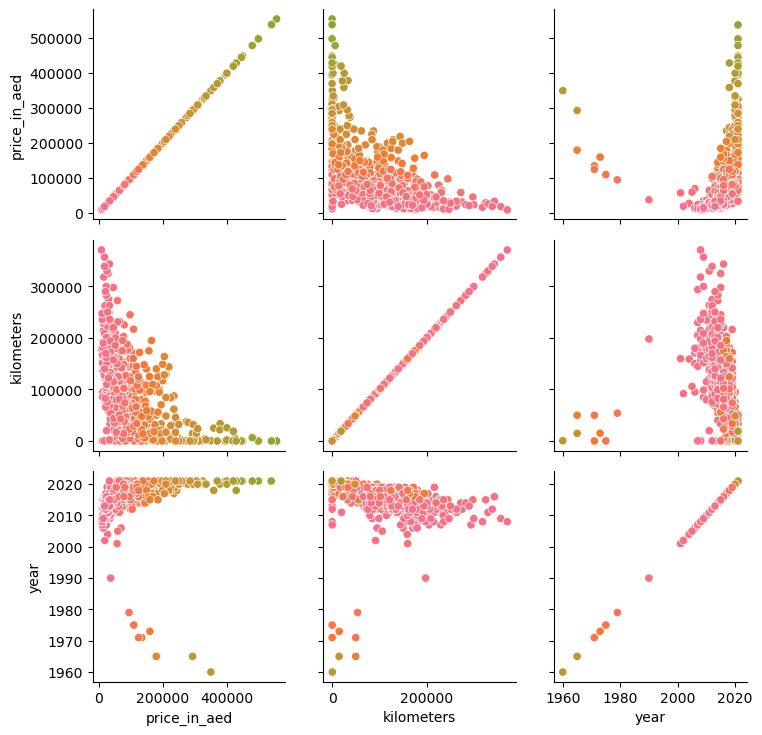

In [99]:
x = sns.PairGrid(dados, hue='precoFaixa', height=2.5)
x.map(sns.scatterplot)
# Cada cor de bolinhas nesse grafico é uma faixa de preço


### Preço x Marca

<AxesSubplot:xlabel='company', ylabel='price_in_aed'>

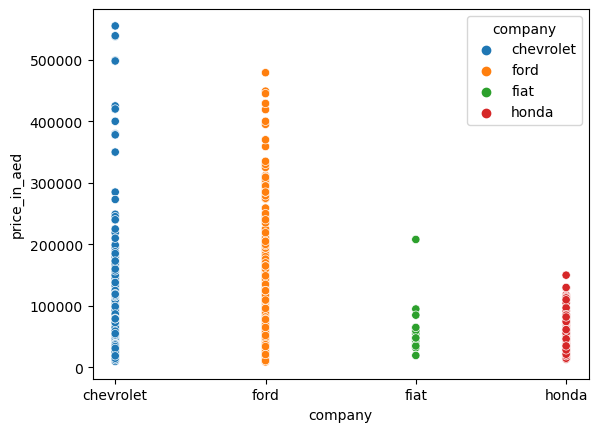

In [101]:
sns.scatterplot(data=dados, x="company", y=preco, hue= dados['company'])

In [103]:
# preco.to_frame()
pd.crosstab(preco, dados['company'])

company,chevrolet,fiat,ford,honda
price_in_aed,,,,
9000.0,0,0,1,0
9900.0,1,0,0,0
11000.0,0,0,1,0
11800.0,0,0,1,0
11900.0,0,0,1,0
...,...,...,...,...
498000.0,1,0,0,0
499000.0,1,0,0,0
538000.0,1,0,0,0


In [104]:
companhiaPreco = dados.groupby(dados['company'])['price_in_aed'].describe()
companhiaPreco

,count,mean,std,min,25%,50%,75%,max
company,,,,,,,,
chevrolet,251.0,99747.557769,98941.227892,9900.0,35250.0,70000.0,119500.0,555000.0
fiat,15.0,62080.000000,45131.082099,19500.0,36500.0,48000.0,64900.0,208000.0
ford,465.0,101484.111828,90667.207762,9000.0,37000.0,68000.0,136000.0,479000.0
honda,126.0,53822.031746,27634.000426,13500.0,30000.0,49999.5,71975.0,149999.0


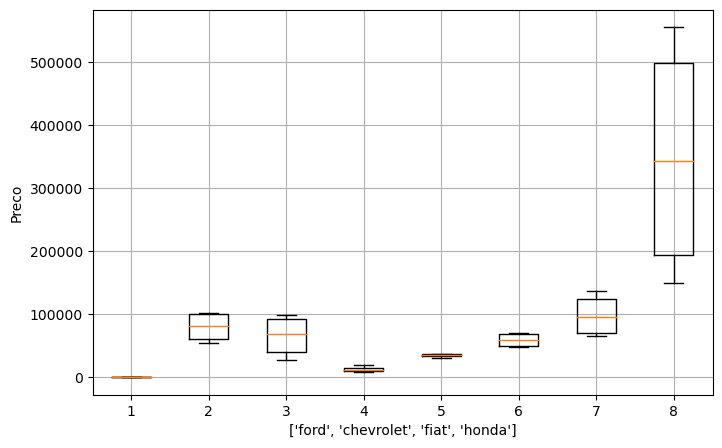

In [105]:
plt.figure(figsize=(8,5))
plt.boxplot(companhiaPreco)
plt.xlabel(marcas)
plt.ylabel('Preco')
plt.grid()
plt.show()

----
### Preço x Condição

In [107]:
corpoPreco = dados.groupby(dados['body_condition'])['price_in_aed'].describe()
corpoPreco

,count,mean,std,min,25%,50%,75%,max
body_condition,,,,,,,,
"A bit of wear & tear, all repaired",18.0,46011.111111,26156.472349,9000.0,33500.0,41350.0,59500.0,120000.0
"No accidents, very few faults",26.0,60795.961538,45334.277363,11000.0,27000.0,62000.0,79000.0,225000.0
Perfect inside and out,813.0,95363.628536,89497.925707,9900.0,36000.0,65000.0,119000.0,555000.0


In [108]:
bodytype = []
for tipo in dados['body_condition']:
    if tipo not in bodytype:
        bodytype.append(tipo)
len(bodytype)

3

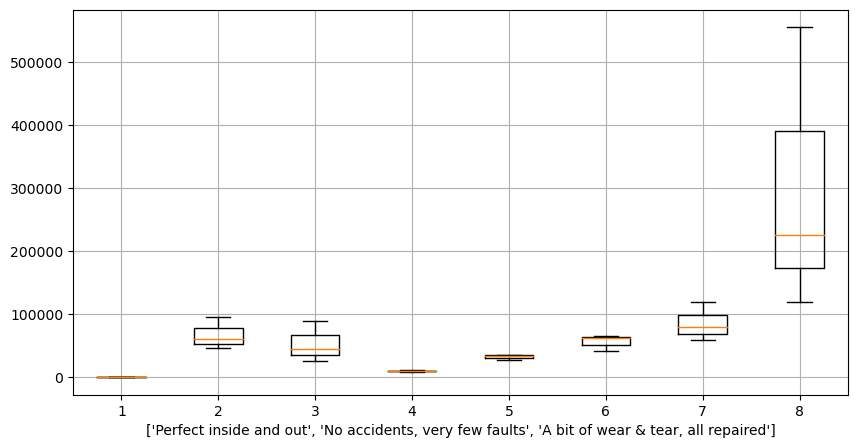

In [110]:
cor = ['r','b','g','m']
plt.figure(figsize=(10,5))
plt.boxplot(corpoPreco)
plt.xlabel(bodytype)
plt.grid()
plt.show()

----
### Preço x Tipo

In [111]:
dados.groupby(dados['body_type'])['price_in_aed'].describe()

,count,mean,std,min,25%,50%,75%,max
body_type,,,,,,,,
Coupe,89.0,103406.730337,96539.672178,23000.0,55000.0,69000.0,124500.0,555000.0
Crossover,12.0,72366.666667,51392.913083,27500.0,41500.0,62450.0,67875.0,195000.0
Hard Top Convertible,17.0,236870.529412,172240.024573,19500.0,110000.0,185000.0,350000.0,539000.0
Hatchback,49.0,34904.061224,18340.908847,11800.0,19500.0,32900.0,44900.0,85000.0
Pick Up Truck,126.0,160332.968254,101738.898011,28000.0,84925.0,143500.0,205000.0,479000.0
SUV,339.0,86732.705015,74736.935487,11000.0,35000.0,59000.0,104400.0,359000.0
Sedan,149.0,39979.778523,20852.625265,9000.0,24500.0,35000.0,52000.0,128900.0
Soft Top Convertible,18.0,107888.888889,72768.479673,13000.0,63375.0,81250.0,123750.0,293000.0
Sports Car,58.0,114267.241379,83397.810960,39000.0,72750.0,89500.0,118750.0,425000.0


----
### Preço x Tipo de Transmissão

In [112]:
dados.groupby(dados['transmission_type'])['price_in_aed'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission_type,,,,,,,,
Automatic Transmission,821.0,93723.781973,88874.755046,9000.0,35000.0,64000.0,115000.0,555000.0
Manual Transmission,36.0,83119.444444,67057.603466,19500.0,35750.0,63000.0,95750.0,350000.0


----
### Preço x Cavalos

In [113]:
dados.groupby(dados['horsepower'])['price_in_aed'].describe()

,count,mean,std,min,25%,50%,75%,max
horsepower,,,,,,,,
150 - 200 HP,151.0,45266.119205,26609.112022,11800.0,26900.0,37000.0,56500.00,208000.0
200 - 300 HP,234.0,67973.649573,61122.982062,11000.0,33000.0,48500.0,76500.00,350000.0
300 - 400 HP,240.0,99843.020833,68303.337263,14000.0,51875.0,82500.0,125750.00,325000.0
400 - 500 HP,148.0,176860.040541,121209.464589,21500.0,97500.0,137000.0,220475.00,555000.0
500 - 600 HP,24.0,196374.958333,130143.990115,9000.0,98000.0,166000.0,256750.00,429000.0
Less than 150 HP,60.0,39131.616667,20199.206490,9900.0,23575.0,33450.0,52474.25,85000.0


----
### Preço x Ano

In [114]:
dados.groupby(dados['year'])['price_in_aed'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1960.0,1.0,350000.000000,NaN,350000.0,350000.0,350000.0,350000.0,350000.0
1965.0,2.0,236500.000000,79903.066274,180000.0,208250.0,236500.0,264750.0,293000.0
1971.0,2.0,130000.000000,7071.067812,125000.0,127500.0,130000.0,132500.0,135000.0
1973.0,1.0,160000.000000,NaN,160000.0,160000.0,160000.0,160000.0,160000.0
1975.0,1.0,110000.000000,NaN,110000.0,110000.0,110000.0,110000.0,110000.0
1979.0,1.0,95000.000000,NaN,95000.0,95000.0,95000.0,95000.0,95000.0
1990.0,1.0,38000.000000,NaN,38000.0,38000.0,38000.0,38000.0,38000.0
2001.0,1.0,57800.000000,NaN,57800.0,57800.0,57800.0,57800.0,57800.0
2002.0,1.0,19500.000000,NaN,19500.0,19500.0,19500.0,19500.0,19500.0


----
### Preço x Km

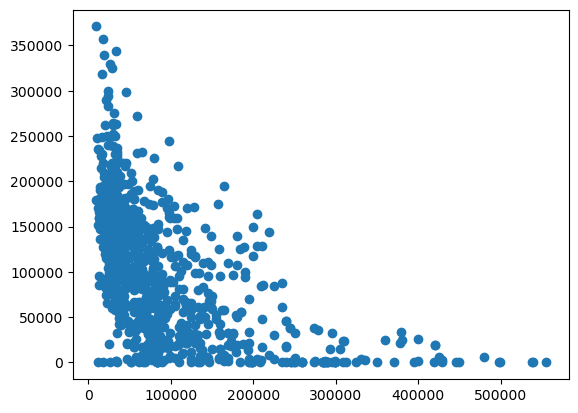

In [115]:
# sns.scatterplot(data=dados, x="company", y=preco, hue= dados['company'])

plt.scatter(dados['price_in_aed'],dados['kilometers'])
plt.show()

In [116]:
#anoQuilometragem = dados.kilometers.corr(dados.year)

precoQuilometragem = preco.corr(dados.kilometers)
print(precoQuilometragem)


-0.551003064959541


----
### Preço x Combustivo

In [118]:
dados.groupby(dados['fuel_type'])['price_in_aed'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel_type,,,,,,,,
Gasoline,857.0,93278.325554,88062.050666,9000.0,35000.0,64000.0,115000.0,555000.0


In [119]:
dados.head(1)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,body_type,transmission_type,horsepower,fuel_type,year,company,date_posted,precoFaixa
1,chevrolet silverado,110000.0,39000,Perfect inside and out,Perfect inside and out,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2018.0,chevrolet,14/01/2022,"(105757.576, 125909.091]"


Predição pela Média

In [120]:
def calcula_preco(companhia, condicaoCorpo, condicaoMecanica,corpo, transmissao, cavalos, combustivel):

    filtradoComp = dados.loc[dados['company'] == str(companhia),:]
    filtradoCorp = filtradoComp.loc[dados['body_condition'] == str(condicaoCorpo),:]
    filtradoMec = filtradoComp.loc[dados['mechanical_condition'] == str(condicaoMecanica),:]
    filtradoCorpo = filtradoComp.loc[dados['body_type'] == str(corpo),:]
    filtradoTran = filtradoComp.loc[dados['transmission_type'] == str(transmissao),:]
    filtradoCav = filtradoComp.loc[dados['horsepower'] == str(cavalos),:]
    filtradoGas = filtradoComp.loc[dados['fuel_type'] == str(combustivel),:]

    estimado = filtradoComp['price_in_aed'].mean() + filtradoCorp['price_in_aed'].mean() + filtradoMec['price_in_aed'].mean() + filtradoCorpo['price_in_aed'].mean() + filtradoTran['price_in_aed'].mean() + filtradoCav['price_in_aed'].mean() + filtradoGas['price_in_aed'].mean()
    
    return 'O preço estimado para o veículo com estas especificações, seria de aproximadamente {:.2f} dolares'.format(estimado/7)
    
    
print(calcula_preco('chevrolet','Perfect inside and out','Perfect inside and out','SUV','Automatic Transmission','400 - 500 HP','Gasoline'))

     

O preço estimado para o veículo com estas especificações, seria de aproximadamente 111616.97 dolares
